In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

2022-12-23 01:10:26.699519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-23 01:10:26.837492: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-23 01:10:26.843059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-23 01:10:26.843074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Text(0.5, 1.0, '2')

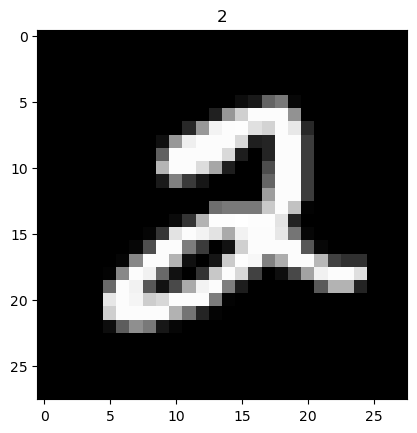

In [4]:
plt.imshow(x_train[5],cmap='gray') # this is how you diaplay an image 
plt.title(y_train[5]) # gave title to the image as its label which is stored in y_train

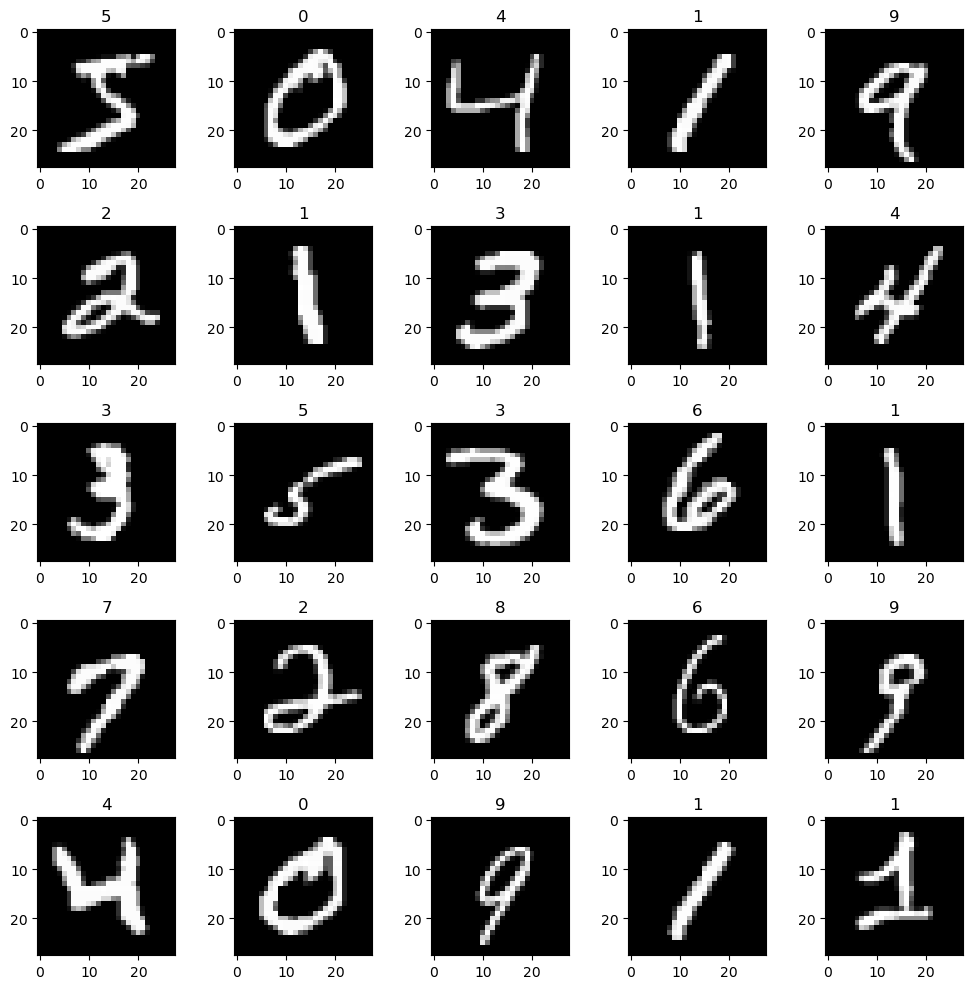

In [5]:
# fetched first 25 images from the dataset just to see
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(y_train[i])
plt.tight_layout()
plt.show()

In [6]:
# Image data Feature Scaling (so to scale the pixel values between range 0 to 1 to fasten the training process 
# and also apply normalization of pixel values)
x_train = x_train / 255
x_test = x_test / 255

### <u>Reshaping the data from 28 x 28 to 28 x 28 x 1 to tell the program that aur images are geryscale images and the are having only 1 layer (either black or white)<u>

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
x_train = x_train.reshape(-1, 28, 28, 1) # rehshape the x_train data 
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test = x_test.reshape(-1, 28, 28, 1) # rehshape the x_test data 
x_test.shape

(10000, 28, 28, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Conv2D , MaxPool2D

### Building The Model

In [11]:
#Inatialized the Sqequential Model
model = Sequential()

# Convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
# Maxpool Layer 1
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Maxpool Layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer 3
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Maxpool Layer 3
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening Layer
model.add(Flatten())

# Dense Layer 1
model.add(Dense(128,activation='relu'))

#Output layer
model.add(Dense(10,activation='softmax'))


2022-12-23 01:10:32.457885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-23 01:10:32.457938: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-23 01:10:32.457978: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dai-Precision-7820-Tower): /proc/driver/nvidia/version does not exist
2022-12-23 01:10:32.458518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [13]:
#model Compilation
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "adam", metrics=["accuracy"])

In [14]:
#Fitting the model
model.fit(x_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 9s 27ms/step - loss: 0.3981 - accuracy: 0.8860
Epoch 2/10
300/300 [==============================] - 8s 26ms/step - loss: 0.1091 - accuracy: 0.9669
Epoch 3/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0774 - accuracy: 0.9771
Epoch 4/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0603 - accuracy: 0.9815
Epoch 5/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0540 - accuracy: 0.9830
Epoch 6/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0451 - accuracy: 0.9862
Epoch 7/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0386 - accuracy: 0.9879
Epoch 8/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 9/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0309 - accuracy: 0.9896
Epoch 10/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0283 - accura

### Prediction Part

In [15]:
# Model Evaluation on Test Set
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 16s 2ms/step - loss: 0.0477 - accuracy: 0.9869


[0.0477302111685276, 0.9868999719619751]

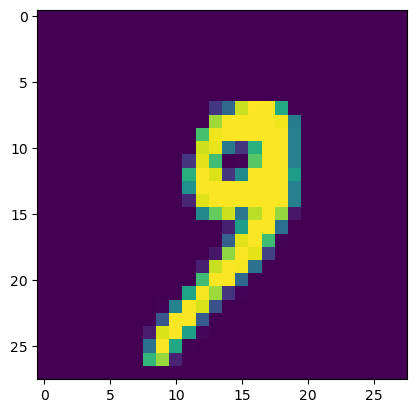

In [16]:
# fetching an image from the test set and stored it in a variable to give it to the model to predict that 
# which digit is appearing in the image
image_to_predict = x_test[1000].reshape(28,28)
plt.imshow(image_to_predict) #plt.imshow is to dispaly the image (either greyscale or RGB)


In [17]:
# here we've done model.predict on the mage that we took out from the test set and reshaped it to (1,28,28,1)
# b'coz at the time of training the model also we reshaped the images from 28 x 28 to 28 x 28 x 1 to add one 
# layer to indicate that it is a grey scale image (we would've added 3 layers in case of RGB image indicating 
# red , Green , Blue layers)

# But it is giving all 10 probabilities of the image being a digit (0,2,3,4,5,6,7,8,9) but we want the max 
# probability the the digit appearing in the image is which class of digit in the Y responce variable and for 
# that in next cell we'll apply numpy argmax() function to fetch max probability

model.predict(image_to_predict.reshape(1,28,28,1))

1/1 [==============================] - 0s 90ms/step


array([[2.2810727e-09, 3.9601487e-09, 3.2371599e-08, 2.8481359e-06,
        2.9161167e-06, 2.4150603e-07, 1.4722635e-12, 2.7292474e-06,
        5.8429418e-06, 9.9998534e-01]], dtype=float32)

In [18]:
np.argmax(model.predict(image_to_predict.reshape(1,28,28,1))) 
# it predicted that the digit appearing in the image is the digit -> '9' 

1/1 [==============================] - 0s 21ms/step


9

In [19]:
import imageio as iio # for reading a new image of a handwrittern digit which I took photo of and saved in 
                      # this pc locally to give it to the model to predict the digit (that which digit is it)  


In [20]:
img = iio.imread("/home/dai/Downloads/IMG_20221223_005307-removebg-preview.png")

/tmp/ipykernel_284372/2901444718.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("/home/dai/Downloads/IMG_20221223_005307-removebg-preview.png")


In [21]:
iio.imwrite("/home/dai/Downloads/IMG_20221223_005307-removebg-preview.png", img)

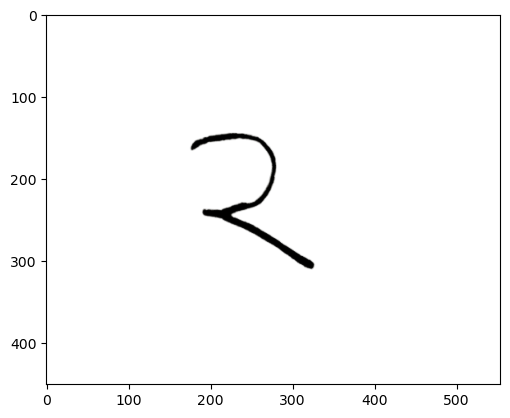

In [22]:
plt.imshow(img)

In [23]:
np.argmax(model.predict(img.reshape(1,28,28,1))) 


ValueError: cannot reshape array of size 999416 into shape (1,28,28,1)

# ↑
### kal sir ko puch ye upper wala cell  